# Práctica 2. Regresión Lineal

### Grupo 41
Alumnos:
- Óscar Rico Rodríguez
- Jia Hao Yang

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as mse

### Tratamiento de datos y separación en dataframe de training y de testing

In [76]:
df = pd.read_csv('tiempos.csv', sep=';')
df.head()

,P1,P2,P3,P4,P5,P6,T_Final
0,02:52:01,04:14:12,05:56:53,06:25:24,08:34:23,10:36:25,11:43:18
1,02:43:32,04:13:40,06:11:44,06:48:12,09:16:50,11:14:02,12:18:22
2,03:08:03,04:39:34,06:29:37,06:59:38,09:40:45,12:08:35,13:23:45
3,03:15:20,04:48:13,06:37:29,07:05:43,09:39:46,12:09:50,13:20:18
4,03:15:53,04:56:32,06:55:22,07:33:08,10:19:46,12:46:40,14:23:46


In [77]:
for col in df.columns:
    for idx in df.index:
        h, m, s = df.loc[idx, col].split(':')
        df.loc[idx, col] = int(h) * 60 + int(m)
df_minutes = df.copy()

In [78]:
train_df, test_df = train_test_split(df_minutes, train_size= 0.7, random_state= False)

### Ejercicio 1. Estimación por regresión lineal

#### Error cuadrático mínimo mediante Regresión Lineal Centralizado

In [79]:
reg_centered = LinearRegression(fit_intercept=True).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])

In [80]:
prediction_centered = reg_centered.predict(test_df[['P1','P2','P3','P4','P5','P6']])

In [81]:
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_centered, squared=False), 2)}')

Mean Squared Error: 14.03


#### Error cuadrático mínimo mediante Regresión Lineal sin Centralizado

In [82]:
reg_not_centered = LinearRegression(fit_intercept= False).fit(train_df[['P1','P2','P3','P4','P5','P6']], train_df[['T_Final']])

In [83]:
prediction_not_centered = reg_not_centered.predict(test_df[['P1','P2','P3','P4','P5','P6']])

In [84]:
print(f'Mean Squared Error: {round(mse(test_df["T_Final"], prediction_not_centered, squared=False), 2)}')

Mean Squared Error: 14.05


#### Barplot entre Regresión Lineal centralizado y sin centralizar

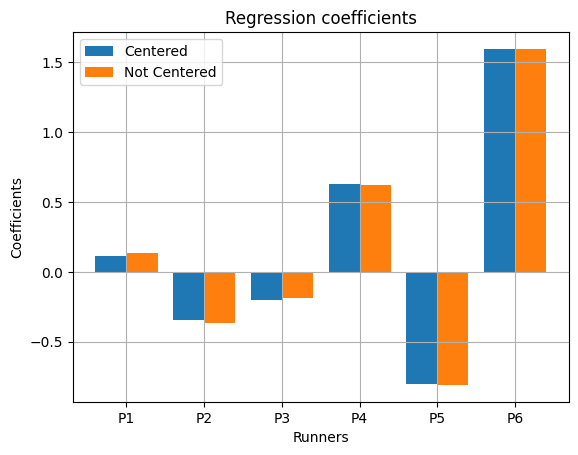

In [85]:
centered_coefs = reg_centered.coef_
not_centered_coefs = reg_not_centered.coef_

X = ['P1','P2','P3','P4','P5','P6']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, centered_coefs[0], 0.4, label = 'Centered')
plt.bar(X_axis + 0.2, not_centered_coefs[0], 0.4, label = 'Not Centered')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Regression coefficients")
plt.legend()
plt.grid()
plt.show()

### Ejercicio 2. Estimación por regresión lineal con regularización

#### Ridge centralizado

In [86]:
# Mete el código de abajo en un bucle para que te muestre los errores para cada valor de alpha
# y así poder elegir el mejor

alphas = [0, 3, 5, 15, 50]
models_centered = []

for alpha in alphas:
    model = Ridge(alpha=alpha).fit(train_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']], train_df[['T_Final']])
    models_centered.append(model)

In [87]:
predictions = []

for model in models_centered:
    prediction = model.predict(test_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']])
    predictions.append(prediction)

In [88]:
for alpha, prediction in zip(alphas, predictions):
    mean_squeared_error = mse(test_df['T_Final'], prediction, squared=False)
    print(f"Mean Squared Error: {round(mean_squeared_error, 2)} for alpha = {alpha}")

Mean Squared Error: 14.03 for alpha = 0
Mean Squared Error: 14.02 for alpha = 3
Mean Squared Error: 14.02 for alpha = 5
Mean Squared Error: 14.01 for alpha = 15
Mean Squared Error: 13.97 for alpha = 50


#### Ridge sin centralizar

In [89]:
models = []

for alpha in alphas:
    model = Ridge(alpha=alpha, fit_intercept=False).fit(train_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']], train_df[['T_Final']])
    models.append(model)

In [90]:
predictions = []

for model in models:
    prediction = model.predict(test_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']])
    predictions.append(prediction)

In [91]:
for alpha, prediction in zip(alphas, predictions):
    mean_squeared_error = mse(test_df['T_Final'], prediction, squared=False)
    print(f"Mean Squared Error: {round(mean_squeared_error, 2)} for alpha = {alpha}")

Mean Squared Error: 14.05 for alpha = 0
Mean Squared Error: 14.05 for alpha = 3
Mean Squared Error: 14.04 for alpha = 5
Mean Squared Error: 14.03 for alpha = 15
Mean Squared Error: 13.99 for alpha = 50


#### Barplot de Ridge centralizado

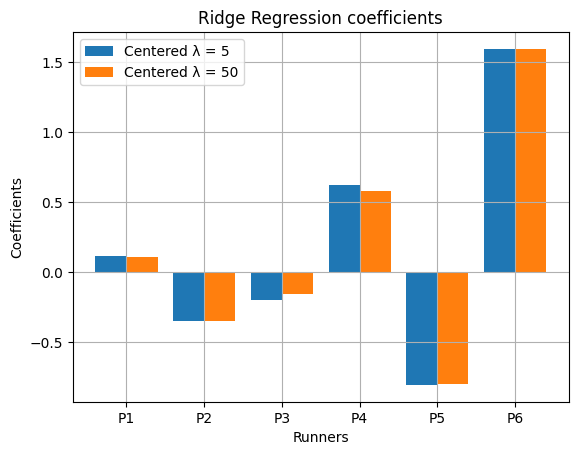

In [92]:
centered_L2_coefs1 = models_centered[2].coef_
centered_L2_coefs2 = models_centered[4].coef_

X = ['P1','P2','P3','P4','P5','P6']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, centered_L2_coefs1[0], 0.4, label = 'Centered λ = 5')
plt.bar(X_axis + 0.2, centered_L2_coefs2[0], 0.4, label = 'Centered λ = 50')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Ridge Regression coefficients")
plt.legend()
plt.grid()
plt.show()

#### Barplot de Ridge sin centralizar

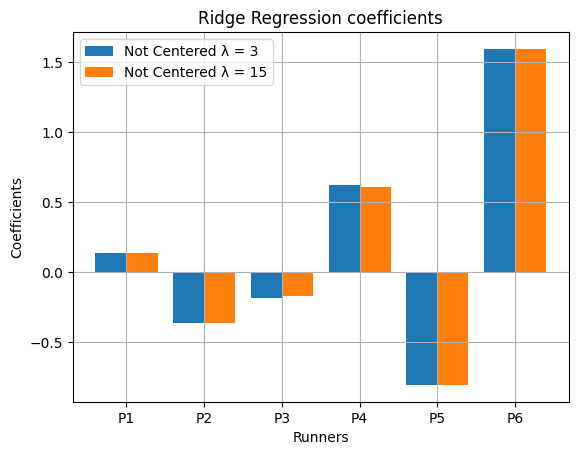

In [93]:
L2_coefs1 = models[1].coef_
L2_coefs2 = models[3].coef_

X = ['P1','P2','P3','P4','P5','P6']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, L2_coefs1[0], 0.4, label = 'Not Centered λ = 3')
plt.bar(X_axis + 0.2, L2_coefs2[0], 0.4, label = 'Not Centered λ = 15')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Ridge Regression coefficients")
plt.legend()
plt.grid()
plt.show()

#### Lasso centralizado

In [94]:
alphas = [0, 10, 30, 50, 100]
models_centered = []

for alpha in alphas:
    model = Lasso(alpha=alpha).fit(train_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']], train_df[['T_Final']])
    models_centered.append(model)

/tmp/ipykernel_40785/2983278089.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=alpha).fit(train_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']], train_df[['T_Final']])
/home/orr/anaconda3/envs/aa1/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/orr/anaconda3/envs/aa1/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+04, tolerance: 5.634e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mo

In [95]:
predictions = []

for model in models_centered:
    prediction = model.predict(test_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']])
    predictions.append(prediction)

In [96]:
for alpha, prediction in zip(alphas, predictions):
    mean_squared_error = mse(test_df['T_Final'], prediction, squared=False)
    print(f"Mean Squared Error: {round(mean_squared_error, 2)} for alpha = {alpha}")

Mean Squared Error: 13.89 for alpha = 0
Mean Squared Error: 12.65 for alpha = 10
Mean Squared Error: 12.6 for alpha = 30
Mean Squared Error: 13.25 for alpha = 50
Mean Squared Error: 13.39 for alpha = 100


#### Lasso sin centralizar

In [97]:
models = []

for alpha in alphas:
    model = Lasso(alpha=alpha,fit_intercept=False).fit(train_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']], train_df[['T_Final']])
    models.append(model)

/tmp/ipykernel_40785/4255970103.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=alpha,fit_intercept=False).fit(train_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']], train_df[['T_Final']])
/home/orr/anaconda3/envs/aa1/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/orr/anaconda3/envs/aa1/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.332e+04, tolerance: 1.484e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented 

In [98]:
predictions = []

for model in models:
    prediction = model.predict(test_df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']])
    predictions.append(prediction)

In [99]:
for alpha, prediction in zip(alphas, predictions):
    mean_squared_error = mse(test_df['T_Final'], prediction, squared=False)
    print(f"Mean Squared Error: {round(mean_squared_error, 2)} for alpha = {alpha}")

Mean Squared Error: 21.19 for alpha = 0
Mean Squared Error: 20.82 for alpha = 10
Mean Squared Error: 20.14 for alpha = 30
Mean Squared Error: 19.44 for alpha = 50
Mean Squared Error: 18.1 for alpha = 100


#### Barplot de Lasso centralizado

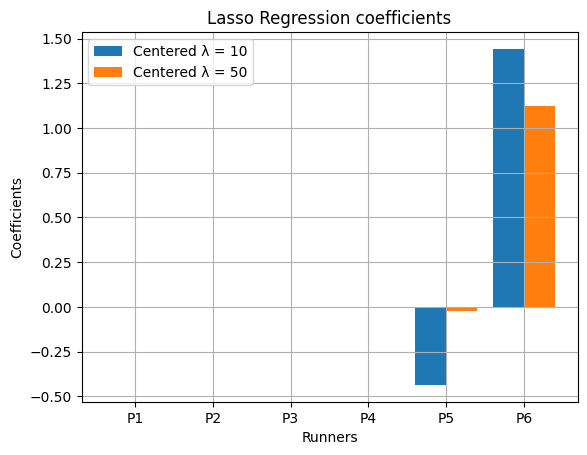

In [100]:
centered_L1_coefs1 = models_centered[1].coef_
centered_L1_coefs2 = models_centered[3].coef_

X = ['P1','P2','P3','P4','P5','P6']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, centered_L1_coefs1, 0.4, label = 'Centered λ = 10')
plt.bar(X_axis + 0.2, centered_L1_coefs2, 0.4, label = 'Centered λ = 50')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Lasso Regression coefficients")
plt.legend()
plt.grid()
plt.show()

#### Barplot de Lasso sin centralizar

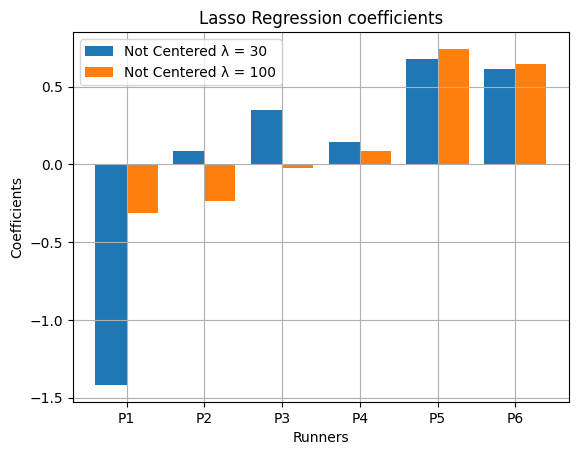

In [102]:
L1_coefs1 = models[2].coef_
L1_coefs2 = models[4].coef_

X = ['P1','P2','P3','P4','P5','P6']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, L1_coefs1, 0.4, label = 'Not Centered λ = 30')
plt.bar(X_axis + 0.2, L1_coefs2, 0.4, label = 'Not Centered λ = 100')
plt.xticks(X_axis, X)
plt.xlabel("Runners")
plt.ylabel("Coefficients")
plt.title("Lasso Regression coefficients")
plt.legend()
plt.grid()
plt.show()